In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from toolz import concat, nth

In [2]:
folders = [
    '/n/groups/datta/Dana/Ontogeny/raw_data/Ontogeny_females',
    '/n/groups/datta/Dana/Ontogeny/raw_data/Ontogeny_males',
    '/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Females',
    '/n/groups/datta/Dana/Ontogeny/raw_data/longtogeny_pre_unet/Males',
    '/n/groups/datta/min/dominance_v1',
    '/n/groups/datta/min/community_v1',
    '/n/groups/datta/min/wheel_062023',
    '/n/groups/datta/min/castrated_v1',
]
folders = [Path(f) for f in folders]

In [3]:
def has_snf(file):
    with h5py.File(file, 'r') as h5f:
        return 'size_normalized_frames' in h5f

In [4]:
file = nth(1, filter(has_snf, concat(f.glob('**/results_00.h5') for f in folders)))
with h5py.File(file, 'r') as h5f:
    frames = h5f['frames'][()]
    norm_frames = h5f['size_normalized_frames'][()]

In [5]:
mask = np.ones((1, 80, 80), dtype='uint8')
mask[..., 30:50, 20:60] = 0
noisy_frames = ((norm_frames * mask) > 2).sum(axis=(1, 2))

In [6]:
indices = np.argsort(noisy_frames)[::-1]

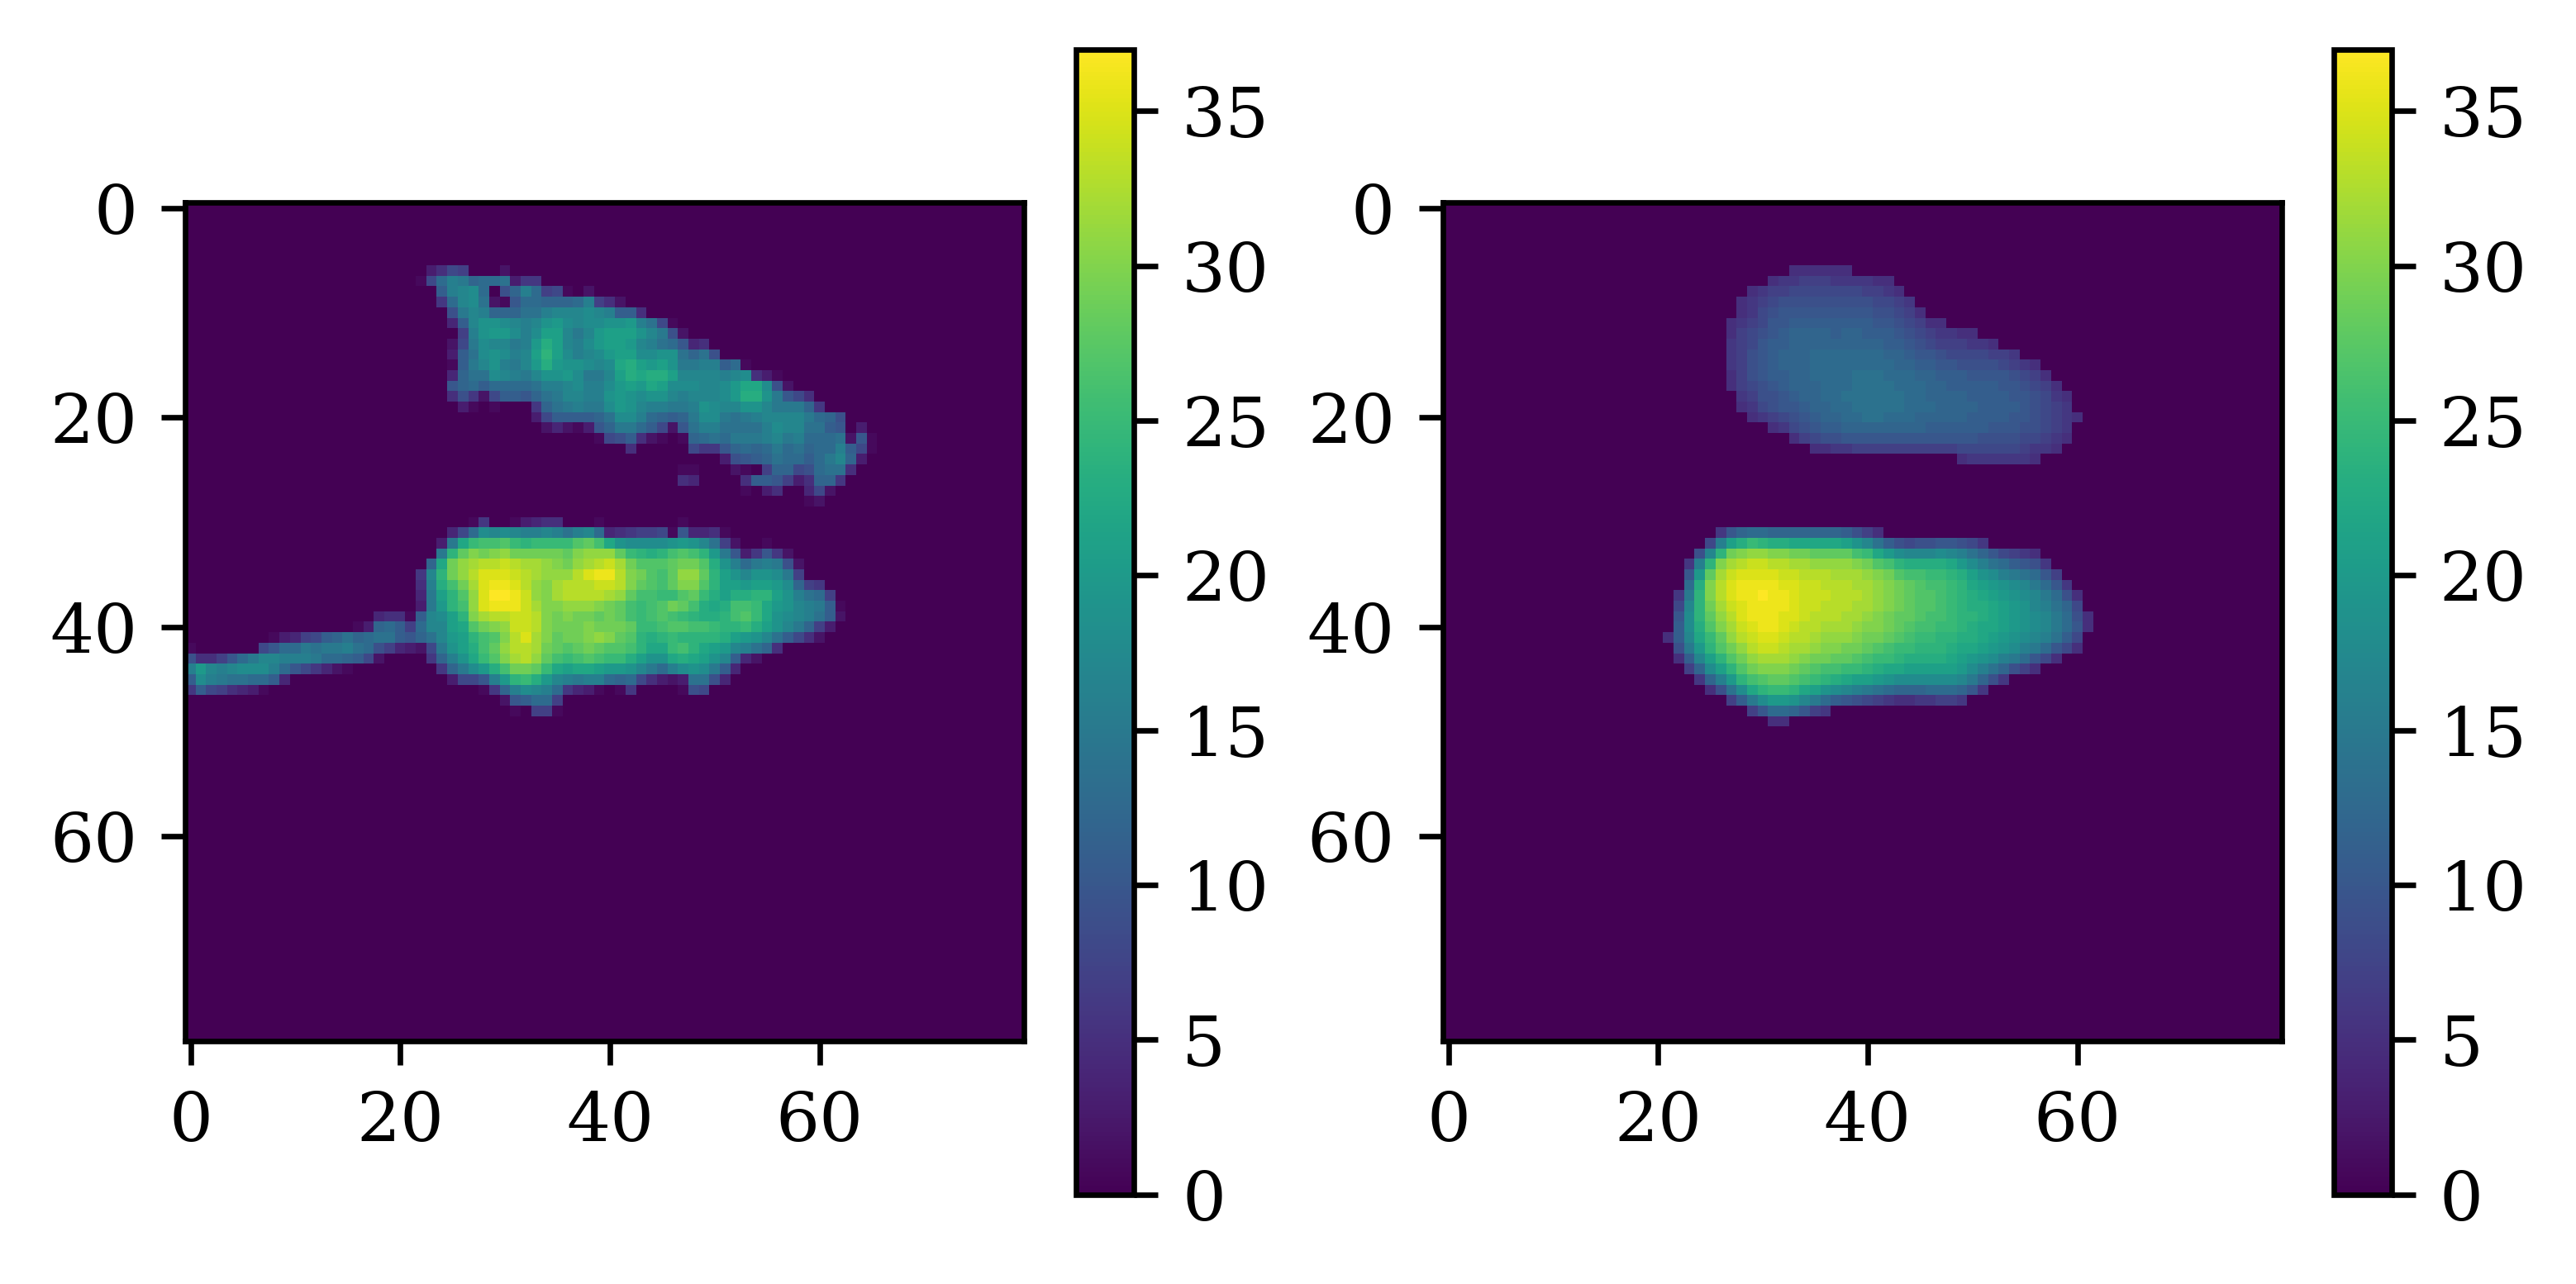

In [16]:
idx = indices[9]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
im = ax[0].imshow(frames[idx])
fig.colorbar(mappable=im, ax=ax[0])
im = ax[1].imshow(norm_frames[idx])
fig.colorbar(mappable=im, ax=ax[1])